# Averages and Variability

Previously we learnt how to do data sampling and how to use frequency distribution table to draw conclusion.

In this topic, we will learn to summarize the distribution of a variable with a single value.

Depending on the particular characteristics of a distribution, we will see that we can summarize it using **the mean, the weighted mean, the median, or the mode.**

We'll also learn to measure the variability in a distribution. If we have a distribution A with the values [3, 3, 3, 3], and a distribution B with [30, 1, 15, 43], we can clearly see that there's much more variability (diversity) in B. We'll learn to quantify variability using measures like **variance** and **standard deviation**.

Once we understand the measures of variability, we can then learn how to locate a value in a distribution, and determine how it compares to other values. For instance, when we analyze salaries, we might want to find out whether a salary of $75000 is common or extreme inside a company. We'll learn to answer this question with precision using a **z-score**.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Examples
distribution = [0,2,3,3,3,4,13]

i=0

for num in distribution:
    i += num

mean = i/len(distribution)


# Sum up the distances of the values that are above the mean, and then sum up separately the distances of 
# the values that are below the mean.ompare the results of the two sums — if they are equal, assign True 
# to a variable named equal_distances, otherwise assign False.
j=0
k=0
for num in distribution:
    if num < mean:
        j += mean - num
    else:
        k += num-mean
print(mean)
print(j==k)

4.0
True


Generate 5000 different distributions, measure the total distances above and below the mean, and check whether they are equal. For each of the 5000 iterations of a for loop:

- Set a seed using the seed() function from numpy.random. For the first iteration, the seed number should be 0, for the second iteration it should be 1, for the third it should be 2, and so on.

- Generate randomly a distribution of integers using the randint() function from numpy.random. Pass the right arguments to randint() such that each distribution will:
  - Have 10 values.
  - The values can range from 0 to 1000.
  
- Compute the mean of the distribution.

- Measure the total distance above and below the mean.Round off each distance to 1 decimal place using the round() function. This will prevent rounding errors at the 13th or 14th decimal place.

- Compare the two sums. If they are equal, then increment a variable named equal_distances with 1. You'll need to define equal_distances outside the loop with a value of 0.

- At the end equal_distances should have a value of 5000. This will confirm that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.

In [31]:
equal_distance = 0
for i in range (0,5000):
    np.random.seed(seed=i)
    rand_dist = np.random.randint(low=0,high=1001,size=10)

    rand_mean = rand_dist.mean()

    rand_var = rand_dist - rand_mean

    
    if round(rand_var[rand_var >0].sum(),1) == abs(round(rand_var[rand_var <0].sum(),1)):
        equal_distance +=1
    else:
        equal_distance +=0

print(equal_distance)
        
    
    
    
    


5000


In [32]:
def cal_mean(x_array):
    cum_i = 0
    n=0
    for i in x_array:
        cum_i += i
        n += 1
        
    mean = cum_i / n
    
    
    return mean

In [41]:
np.random.seed(1)
a = np.random.randint(1,100,10)
print(a.mean())
print(cal_mean(a))

38.0
38.0


## Example

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set. Here's a brief extract from the data set:

The data set is stored in a file named AmesHousing_1.txt. Read the file as a pandas DataFrame, and store it in a variable named houses.


- The values in each row are tab-separated, which means AmesHousing_1.txt is a TSV (tab-separated value) file. This is different from a CSV (comma-separated values) file, where the values are separated by commas, not by a tab character.


- Use the pd.read_table() function or pd.read_csv(sep = '\t') to read in the data set.


In [44]:
dataset_loc = 'D:/Dataquest/Dataquest 2022 Learning/Datasets/'
df = pd.read_csv(dataset_loc + 'AmesHousing_1.txt', sep='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [46]:
df['SalePrice'].head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [48]:
df['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

In [49]:
df.shape

(2930, 82)

In [51]:
len(df['PID'].unique())

2930

In [54]:
pop_mean = df['SalePrice'].mean()
print(pop_mean)

180796.0600682594


In [69]:
sample_mean = []
sample_error = []
sample_size_list = []
for i in range(0,101):
    sample_size = 5 + i*29
    x_mean = df['SalePrice'].sample(n=(sample_size), random_state=0+i).mean()
    x_error = pop_mean - x_mean
    sample_size_list.append(sample_size)
    sample_mean.append(x_mean)
    sample_error.append(x_error)


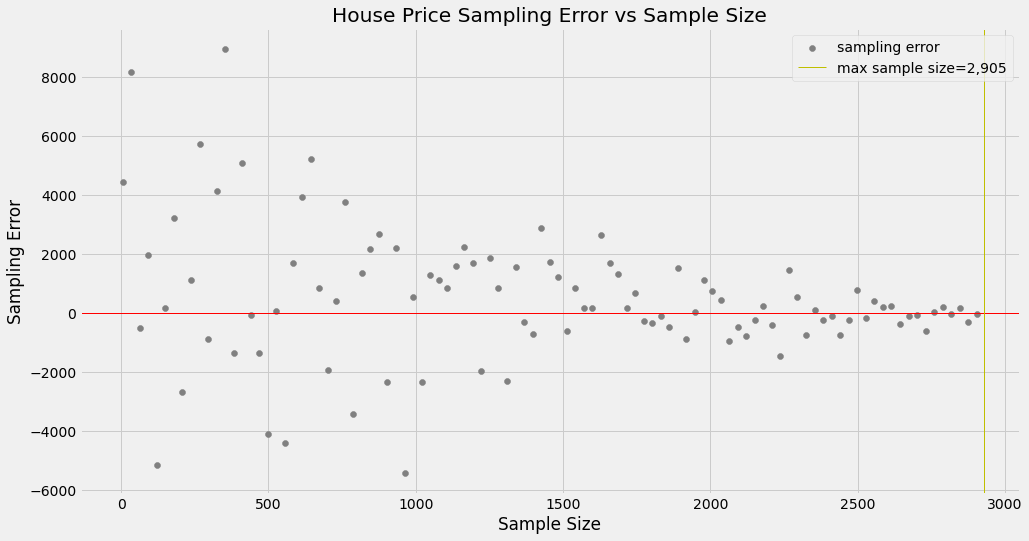

In [96]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (15,8))
ax.scatter(sample_size_list,sample_error,label = 'sampling error',color='grey')
ax.axhline(y=0,color='r',linewidth=1)
ax.axvline(x=2930,color='y',linewidth = 1,label='max sample size=2,905')
ax.set(ylabel='Sampling Error',xlabel='Sample Size',title='House Price Sampling Error vs Sample Size')
ax.legend(loc='upper right')

### We can see from above chart that for the sampling error decreases when sample size increase

In [97]:
#Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. 
# For each of the 10000 iterations of a for loop:
sample_mean = []
for i in range(0,10000):
    mean = df['SalePrice'].sample(n=100,random_state=i).mean()
    sample_mean.append(mean)

    

In [109]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

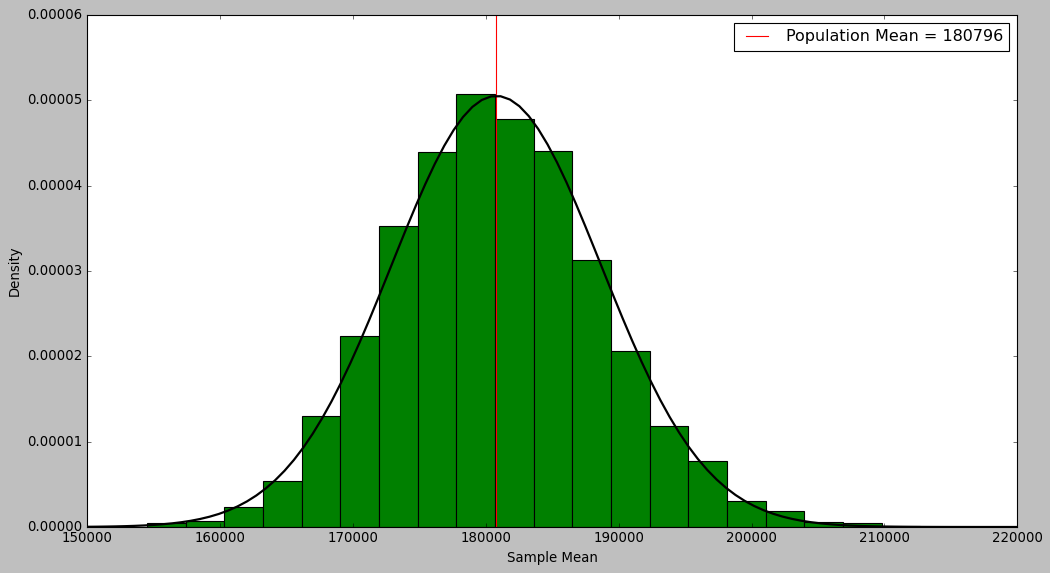

In [132]:
from scipy.stats import norm

#fit a normal distribution to the data: mean and standard deviation
mu,std = norm.fit(sample_mean)


plt.style.use('classic')
fig,ax=plt.subplots(figsize=(15,8))
ax.hist(sample_mean,bins=20,color='g',density=True)
ax.axvline(pop_mean,color='r',label = 'Population Mean = 180796')

# Plot the PDF - fit a normal distribution curve on histogram
xmin,xmax = plt.xlim()
x=np.linspace(xmin,xmax,100)
p = norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)

ax.set(ylabel='Density',xlabel='Sample Mean')
ax.legend()

In [136]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [162]:
houses_sold_count = df['Yr Sold'].value_counts().sort_index()
houses_sold_count

2006    625
2007    694
2008    622
2009    648
2010    341
Name: Yr Sold, dtype: int64

In [173]:
houses_year_groupby = df[['Yr Sold','SalePrice']].groupby(by='Yr Sold').mean()
houses_year_groupby 

,SalePrice
Yr Sold,
2006,181761.648000
2007,185138.207493
2008,178841.750804
2009,181404.567901
2010,172597.598240


In [174]:
houses_per_year = houses_year_groupby.join(houses_sold_count,rsuffix='Houses Sold')
houses_per_year = houses_per_year.rename(columns={'Yr Sold':'Houses Sold','SalePrice':'Mean Price'})
houses_per_year.reset_index(drop=False,inplace=True)
houses_per_year = houses_per_year.rename(columns={'Yr Sold':'Year'})
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [179]:
mean_new = houses_per_year['Mean Price'].mean()

print(f'new mean is {mean_new}')
print(f'original mean is {pop_mean}')

new mean is 179948.75448767154
original mean is 180796.0600682594


In [183]:
(houses_per_year['Mean Price'] * 
 houses_per_year['Houses Sold']).sum()/houses_per_year['Houses Sold'].sum()


180796.0600682594

In [185]:
def cal_weighted_mean(value,wgt):
       
    return (value*wgt).sum()/wgt.sum()

In [186]:
cal_weighted_mean(houses_per_year['Mean Price'],houses_per_year['Houses Sold'])

180796.0600682594

**numpy.average**


**numpy.average(a, axis=None, weights=None, returned=False)**

In [187]:
np.average(a = houses_per_year['Mean Price'],weights = houses_per_year['Houses Sold'])

180796.0600682594